# Importing the libraries

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import xgboost

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

Using TensorFlow backend.


# Loading the dataset

In [0]:
df = pd.read_csv("drive/My Drive/poster/sp1/normalized_energy_efficiency_dataset.csv")

In [0]:
df

,Unnamed: 0,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0,0.98,0.000000,0.285714,0.000000,7.0,2,0.0,0,15.55,21.33
1,1,0.98,0.000000,0.285714,0.000000,7.0,3,0.0,0,15.55,21.33
2,2,0.98,0.000000,0.285714,0.000000,7.0,4,0.0,0,15.55,21.33
3,3,0.98,0.000000,0.285714,0.000000,7.0,5,0.0,0,15.55,21.33
4,4,0.90,0.166667,0.428571,0.111111,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...,...
763,763,0.64,0.916667,0.571429,1.000000,3.5,5,0.4,5,17.88,21.40
764,764,0.62,1.000000,0.714286,1.000000,3.5,2,0.4,5,16.54,16.88
765,765,0.62,1.000000,0.714286,1.000000,3.5,3,0.4,5,16.44,17.11
766,766,0.62,1.000000,0.714286,1.000000,3.5,4,0.4,5,16.48,16.61


# Creating the XGboost model for heating load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (heating load) como la que queremos predecir
'''
X = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X.shape

(768, 8)

In [0]:
# Fitting XGBoost to the Training set
xgb_model_heating = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model_heating.fit(X_train,y_train)

[02:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [0]:
# Predicting the Test set results
y_pred = xgb_model_heating.predict(X_test)
y_pred

array([3.0085897 , 2.0067592 , 2.00115   , 0.01858616, 1.0749451 ,
       2.0497806 , 2.0079098 , 1.9949814 , 2.9992566 , 4.017947  ,
       0.00811711, 1.0046986 , 4.996665  , 1.9991254 , 4.9970245 ,
       3.98824   , 2.9792788 , 1.0430127 , 4.6855884 , 2.0187664 ,
       3.0038733 , 2.0757375 , 3.0115862 , 2.0024314 , 0.00589836,
       2.0137925 , 4.5145316 , 4.9672923 , 0.98620737, 4.9979653 ,
       4.9849753 , 2.9903553 , 2.98905   , 1.9998155 , 3.007461  ,
       2.9822972 , 2.9776473 , 4.9700484 , 1.5687946 , 0.02989683,
       3.0054278 , 2.0133429 , 1.008822  , 3.016047  , 0.02244234,
       2.9783304 , 4.977179  , 3.0023577 , 4.0285406 , 4.005938  ,
       2.0153646 , 2.020982  , 3.9987936 , 4.9913845 , 3.977418  ,
       0.99537337, 0.01997942, 1.0144403 , 3.9912724 , 4.005857  ,
       2.9986043 , 2.015447  , 3.0016952 , 4.999449  , 1.0191953 ,
       2.9877264 , 1.9975305 , 4.9977317 , 4.972781  , 2.992512  ,
       2.7217565 , 3.9957366 , 4.9831247 , 2.0601356 , 3.95404

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_heat = pd.DataFrame()

In [0]:
df_heat['original_values'] = y_test.flatten()
df_heat['Predicted_Values'] = y_pred

In [0]:
df_heat

,original_values,Predicted_Values
0,3,3.008590
1,2,2.006759
2,2,2.001150
3,0,0.018586
4,1,1.074945
...,...,...
149,4,4.008700
150,5,5.001456
151,4,3.992994
152,5,1.943928


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_heat = mean_squared_error(df_heat['original_values'], df_heat['Predicted_Values'])
mse_heat

0.07486880253169681

In [0]:
# Calculamos el Mean Absolute Error
mae_heat = mean_absolute_error(df_heat['original_values'], df_heat['Predicted_Values'])
mae_heat

0.060607150777593835

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_heat)
root_mean_squared_error

0.27362164119765237

Text(0, 0.5, 'Heating Load')

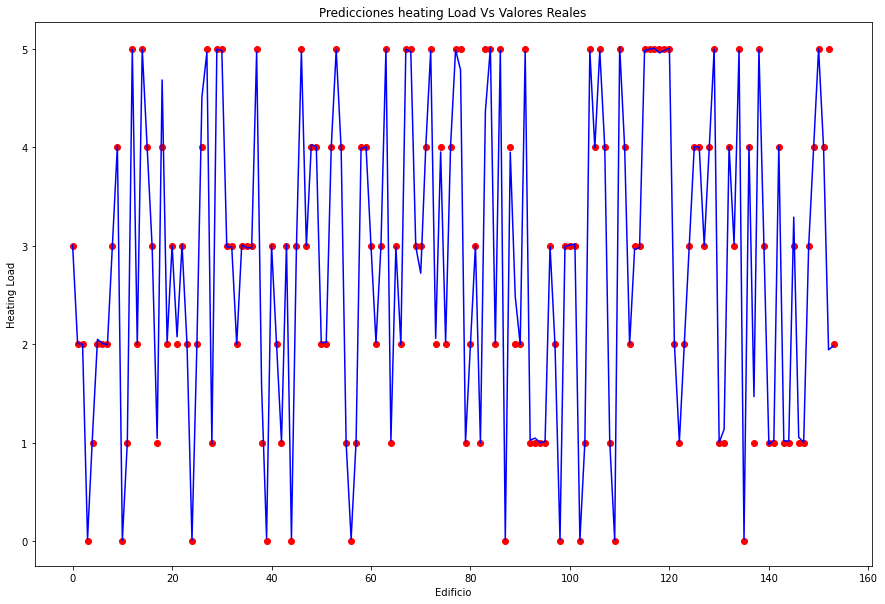

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.plot(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

Text(0, 0.5, 'Heating Load')

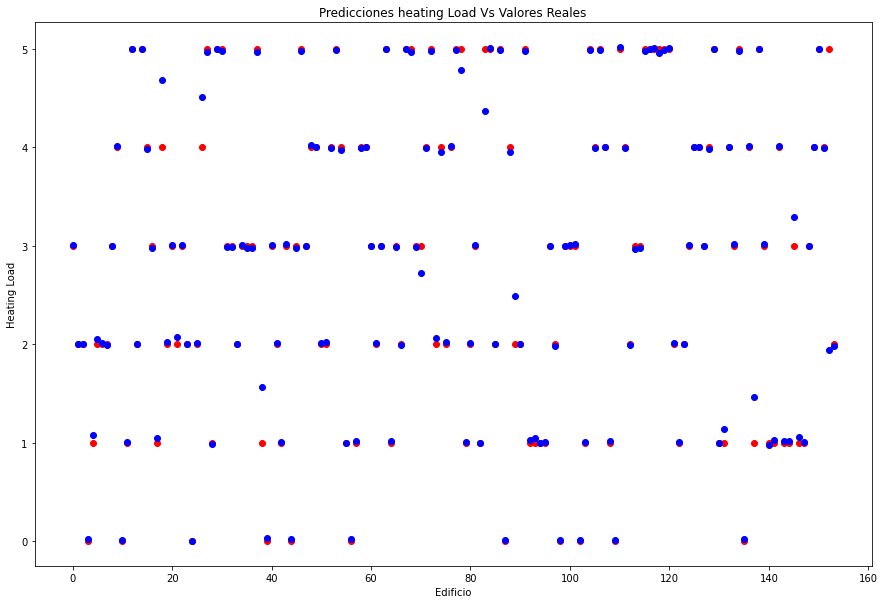

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test.size), y_test, color = 'red')
ax.scatter(np.arange(0, y_test.size), y_pred, color = 'blue')
plt.title('Predicciones heating Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Heating Load')

# Creating the XGBoost for cooling load

In [0]:
'''
Aqui cargamos las variables vamos a utilizar las 7 variables como variables 
de entrenamiento y una unica variable (cooling load) como la que queremos predecir
'''
X_cooling= df.iloc[:, 0:8].values
y_cooling = df.iloc[:, 9:10].values

In [0]:
'''
Partimos el dataset en training y testing con una proporción de 
20% para testing y 80% para training
'''
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(X_cooling, y_cooling, test_size = 0.2, random_state = 0)

In [0]:
# Verificamos el shape para ver si tenemos la cantidad correcta de variables para entrenar
X_cooling.shape

(768, 8)

In [0]:
# Fitting XGBoost to the Training set
xgb_model_cooling = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model_cooling.fit(X_train_cooling,y_train_cooling)

[02:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [0]:
# Predicting the Test set results
y_pred_cooling = xgb_model_cooling.predict(X_test_cooling)
y_pred_cooling

array([14.981023 , 10.440404 , 36.63036  , 16.868273 , 32.678474 ,
       29.013632 , 28.507442 , 29.133406 , 28.253704 , 23.156916 ,
        6.097567 , 42.19259  , 11.150812 , 42.36496  , 41.257713 ,
       26.706665 , 10.887251 , 28.983501 , 14.570889 , 12.534554 ,
       12.528251 , 32.945305 , 10.677113 , 39.626312 ,  5.8079467,
       14.69162  , 12.9207325, 15.098724 , 10.625896 , 39.557915 ,
       12.783943 , 12.766382 , 41.55138  , 13.006351 , 28.654102 ,
       36.854126 , 14.122426 , 36.87117  , 17.09931  , 10.797115 ,
       11.344224 , 39.89311  , 14.543373 , 24.990297 , 19.412998 ,
       24.246962 , 10.672826 , 12.582756 , 28.920218 , 31.584751 ,
       32.648636 , 13.055298 , 32.958485 , 15.01547  , 37.00829  ,
       10.169743 , 16.15966  , 25.79684  , 38.486065 , 14.4704685,
       14.805797 , 12.388903 , 32.53951  , 10.262485 , 12.740308 ,
       12.119512 , 39.263275 , 11.204093 , 26.716518 , 39.153877 ,
       32.639854 , 10.549477 , 23.73172  , 17.085218 , 15.3368

In [0]:
'''
 Creamos un dataframe que contenga los resultados reales del testing y los 
 resultados de la prediccion que realizamos esto es para luego poder calcular
 el mse, rmse, mae
'''
df_cooling = pd.DataFrame()

In [0]:
df_cooling['original_values'] = y_test_cooling.flatten()
df_cooling['Predicted_Values'] = y_pred_cooling

In [0]:
df_cooling

,original_values,Predicted_Values
0,15.18,14.981023
1,10.32,10.440404
2,37.26,36.630360
3,16.95,16.868273
4,32.26,32.678474
...,...,...
149,14.33,14.534683
150,28.15,28.207455
151,11.33,11.325010
152,13.86,15.202519


In [0]:
'''
Todos los calculos que se van a realizar posteriormente 
nos ayudaran a poder ver el performance del modelo
'''

# Calculamos el Mean squared Error
mse_cooling = mean_squared_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mse_cooling

0.35188974713722015

In [0]:
# Calculamos el Mean Absolute Error
mae_cooling = mean_absolute_error(df_cooling['original_values'], df_cooling['Predicted_Values'])
mae_cooling

0.3917213339619822

In [0]:
# Calculamos el Root Mean Squared Error 
root_mean_squared_error = sqrt(mse_cooling)
root_mean_squared_error

0.5932029561096439

Text(0, 0.5, 'Cooling Load')

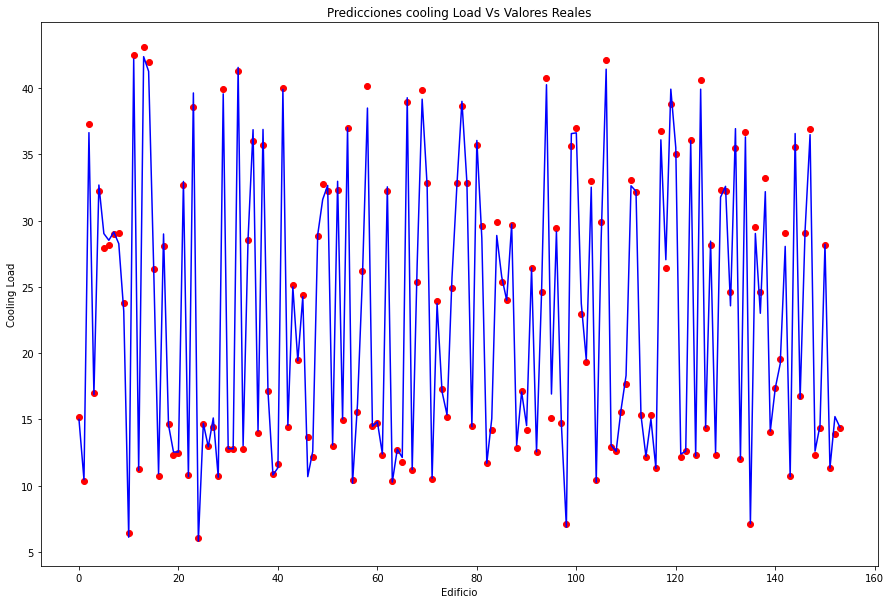

In [0]:
'''
Esta grafica nos ayudara a poder visualizar los resultado de nuestro 
modelo, tenemos dos graficas una que tiene una linea (azul) que esta 
representa los valores predichos esta nos ayuda a poder ver las predicciones
y ver como es su comportamiento.

En la segunda grafica podemos observar las predicciones pero ahora en un 
scatterplot y esto nos ayudara a confirmar si estamos haciendo 
overfitting y si que tanto se alinean nuestras predicciones 
con el valor real.
'''
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.plot(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')

Text(0, 0.5, 'Cooling Load')

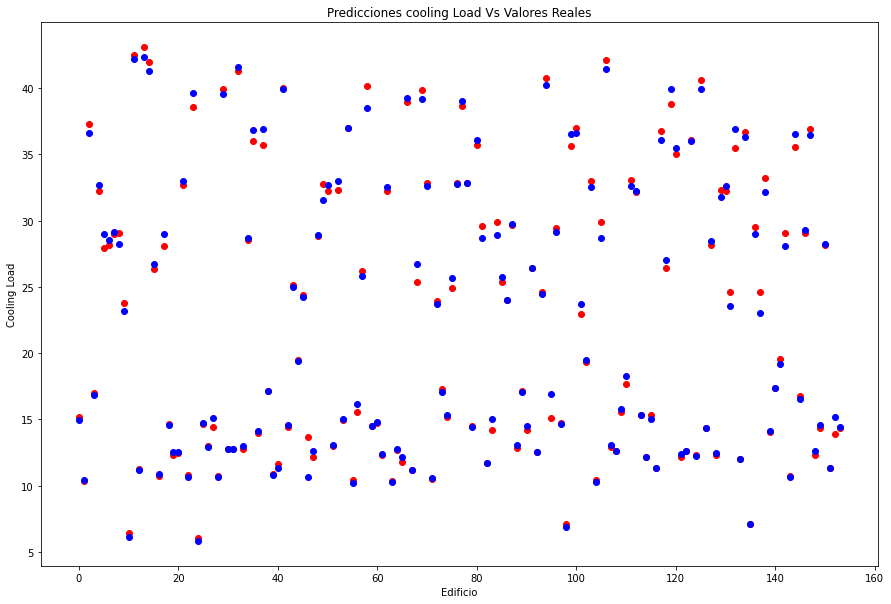

In [0]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(np.arange(0, y_test_cooling.size), y_test_cooling, color = 'red')
ax.scatter(np.arange(0, y_test_cooling.size), y_pred_cooling, color = 'blue')
plt.title('Predicciones cooling Load Vs Valores Reales')
plt.xlabel('Edificio')
plt.ylabel('Cooling Load')